# Алгоритм поиска центра тяжести (центроида) плоской фигуры

Рассмотрим плоскую фигуру (треугольник, прямоугольник, трапецию) как произвольный многоугольник,
заданный упорядоченным списком вершин:

$$
(x_0, y_0), (x_1, y_1), \dots, (x_{n-1}, y_{n-1})
$$

Вершины должны быть перечислены по или против часовой стрелки.

---

## Шаг 1. Вычисление ориентированной площади

Используем формулу Гаусса (shoelace formula):

$$
A = \frac{1}{2} \sum_{i=0}^{n-1} (x_i y_{i+1} - x_{i+1} y_i)
$$

где индекс $i+1$ берётся по модулю $n$.

Если

$$
A = 0
$$

то фигура вырождена (лежит на одной линии).

---

## Шаг 2. Вычисление координат центра тяжести

Сначала вычисляем вспомогательные суммы:

$$
C_x = \sum_{i=0}^{n-1} (x_i + x_{i+1})(x_i y_{i+1} - x_{i+1} y_i)
$$

$$
C_y = \sum_{i=0}^{n-1} (y_i + y_{i+1})(x_i y_{i+1} - x_{i+1} y_i)
$$

Затем делим на $6A$:

$$
x_c = \frac{1}{6A} C_x
$$

$$
y_c = \frac{1}{6A} C_y
$$

---

## Шаг 3. Результат

Центр тяжести фигуры:

$$
C = (x_c, y_c)
$$

---

## Свойства алгоритма

- Работает для треугольников, прямоугольников, трапеций и любого многоугольника
- Основан на геометрической декомпозиции площади
- Имеет вычислительную сложность:

$$
O(n)
$$

где $n$ — количество вершин.


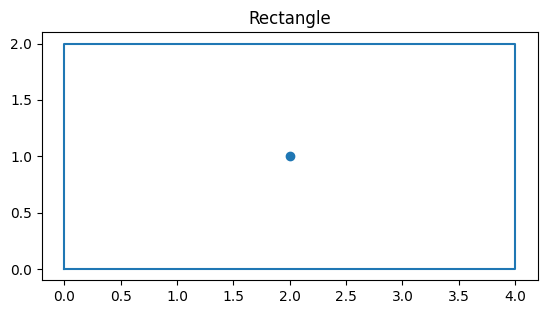

Площадь: 8.0
Центр тяжести: (2.000, 1.000)


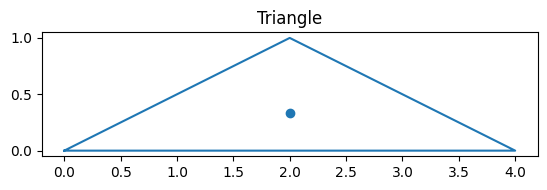

Площадь: 2.0
Центр тяжести: (2.000, 0.333)


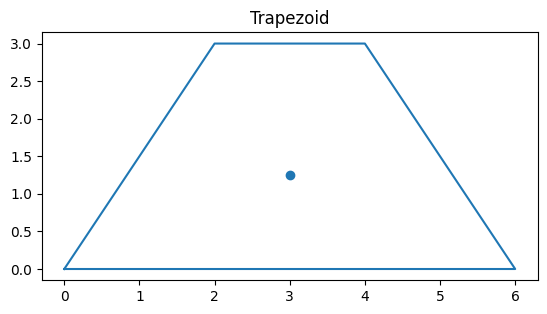

Площадь: 12.0
Центр тяжести: (3.000, 1.250)


In [5]:
import matplotlib.pyplot as plt

def polygon_area_and_centroid(vertices):
    """
    Вычисляет площадь и центр тяжести произвольного многоугольника.
    vertices: список кортежей (x, y)
    """
    n = len(vertices)
    area = 0
    cx = 0
    cy = 0

    for i in range(n):
        x0, y0 = vertices[i]
        x1, y1 = vertices[(i + 1) % n]

        cross = x0 * y1 - x1 * y0
        area += cross
        cx += (x0 + x1) * cross
        cy += (y0 + y1) * cross

    area *= 0.5

    if area == 0:
        raise ValueError("Площадь равна нулю")

    cx /= (6 * area)
    cy /= (6 * area)

    return abs(area), cx, cy


def plot_shape(vertices, title="Shape"):
    area, cx, cy = polygon_area_and_centroid(vertices)

    xs = [v[0] for v in vertices] + [vertices[0][0]]
    ys = [v[1] for v in vertices] + [vertices[0][1]]

    plt.figure()
    plt.plot(xs, ys)
    plt.scatter(cx, cy)
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    print(f"Площадь: {area}")
    print(f"Центр тяжести: ({cx:.3f}, {cy:.3f})")


# Примеры фигур

rectangle = [(0, 0), (4, 0), (4, 2), (0, 2)]
triangle = [(0, 0), (4, 0), (2, 1)]
trapezoid = [(0, 0), (6, 0), (4, 3), (2, 3)]

plot_shape(rectangle, "Rectangle")
plot_shape(triangle, "Triangle")
plot_shape(trapezoid, "Trapezoid")
